# Фаза 2 • Неделя 8 • Вторник
## Нейронные сети
### 🔥 PyTorch: Fashion MNIST

В этом задании необходимо классифицировать изображения датасета Fashion MNIST - аналогичного набору рукописных цифр. Для решения этой задачи не нужна сложная нейросеть, 

In [59]:
import torch
from torch import nn
from torch.nn import functional as F, Dropout
from torch.utils.data import DataLoader
from torch.xpu import device
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torchutils as tu
import matplotlib.pyplot as plt
import numpy as np

from add.intro.torch_intro import model, predictions

plt.rcParams['figure.dpi'] = 120


ModuleNotFoundError: No module named 'add.intro.torch_intro'

In [60]:
train_loader = DataLoader(
    FashionMNIST(
        root='data/', 
        train=True,
        download=True,
        transform=ToTensor()
    ),
    batch_size=64

)
valid_loader = DataLoader(
    FashionMNIST(
        root='data/', 
        train=False,
        download=True,
        transform=ToTensor()
    ),
    batch_size=64
)

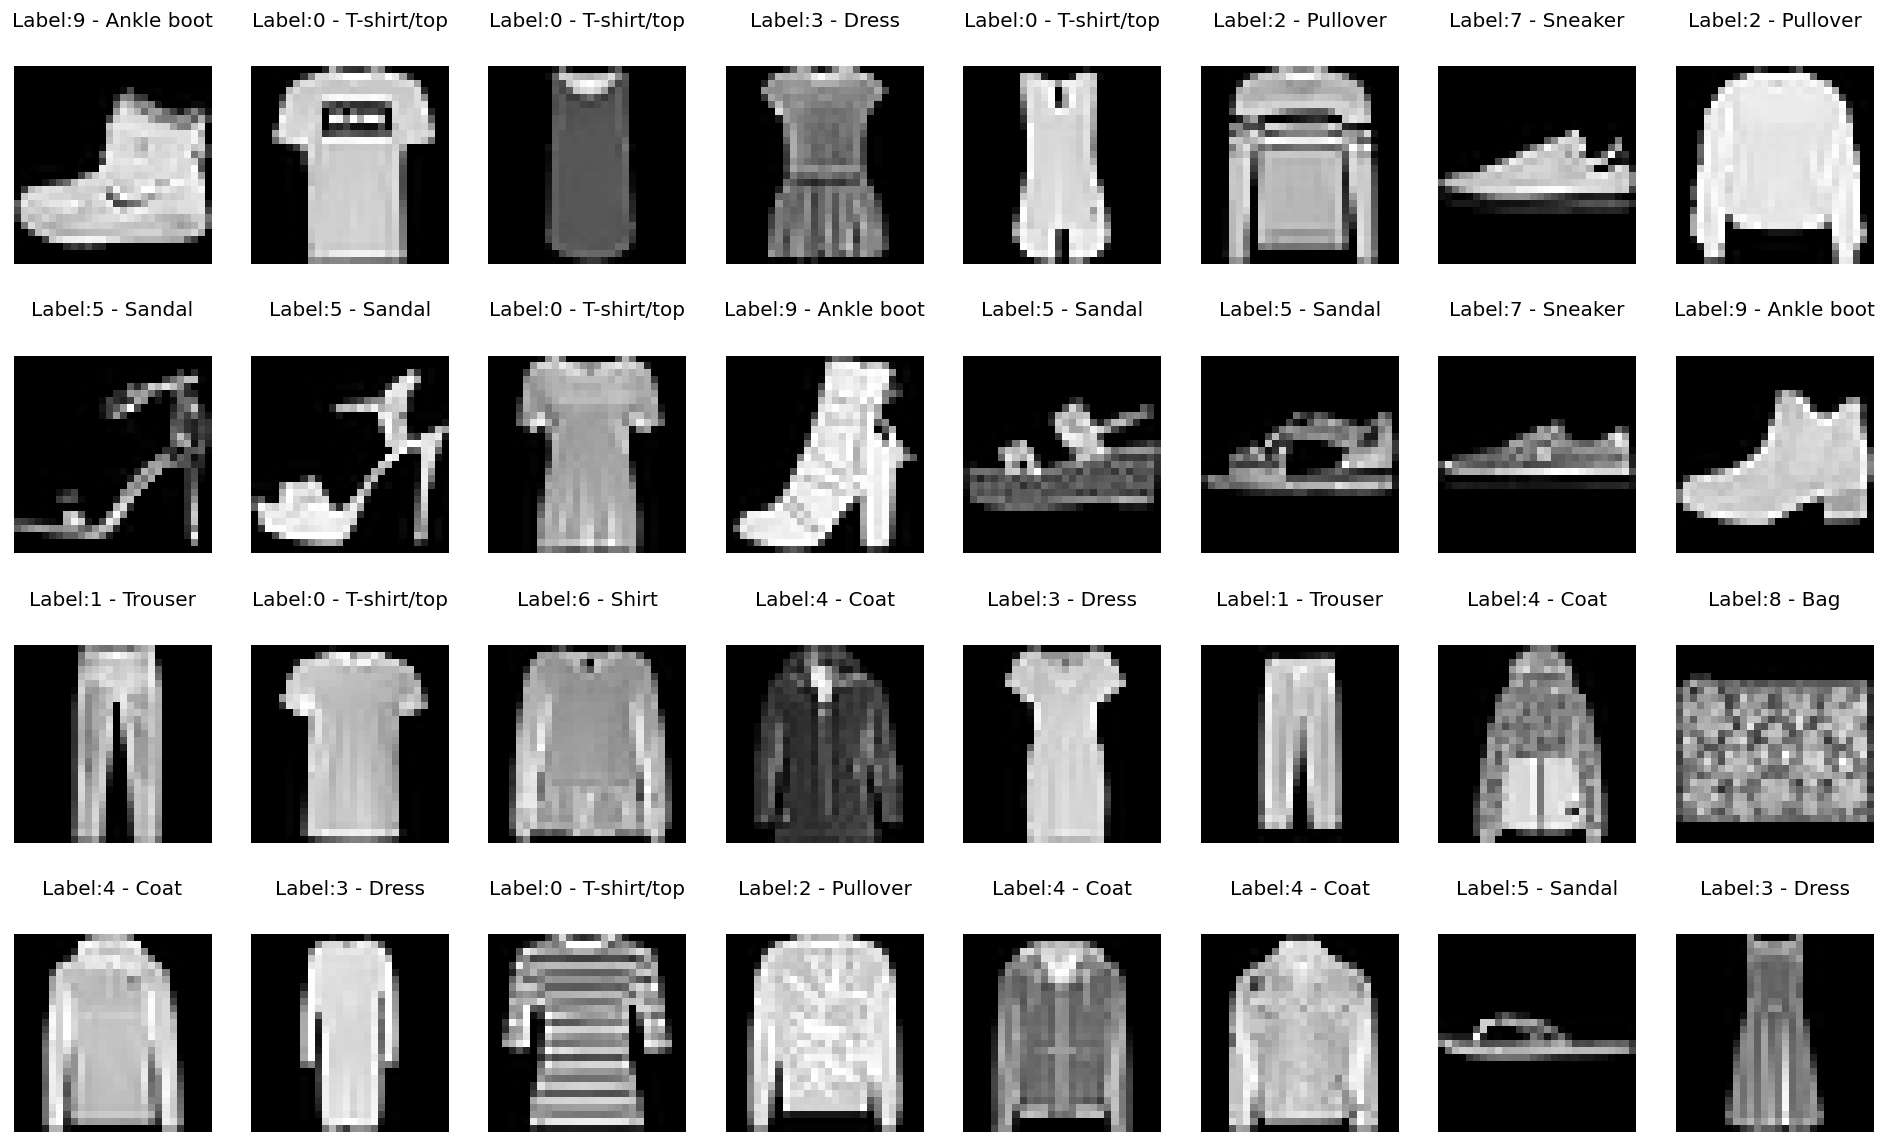

In [61]:
def get_batch_from_loader(loader):
    batch, labels = next(iter(loader))
    return batch, labels

# распечатаем произвольную картинку
fig, ax = plt.subplots(4, 8, figsize=(20, 12))
ax = ax.flatten()
batch, labels = get_batch_from_loader(train_loader)
for i, plot in enumerate(ax):
    plot.set_title(f'Label:{labels[i]} - {train_loader.dataset.classes[labels[i]]}')
    plot.matshow(batch[i][0, :, :], cmap='gray')
    plot.axis('off')

In [62]:
# train_loader.dataset.classes
# train_loader.dataset.class_to_idx

In [63]:
print('batch:', tuple(batch.shape))
for i, x in enumerate(batch):
    print(i, tuple(x.shape))

batch: (64, 1, 28, 28)
0 (1, 28, 28)
1 (1, 28, 28)
2 (1, 28, 28)
3 (1, 28, 28)
4 (1, 28, 28)
5 (1, 28, 28)
6 (1, 28, 28)
7 (1, 28, 28)
8 (1, 28, 28)
9 (1, 28, 28)
10 (1, 28, 28)
11 (1, 28, 28)
12 (1, 28, 28)
13 (1, 28, 28)
14 (1, 28, 28)
15 (1, 28, 28)
16 (1, 28, 28)
17 (1, 28, 28)
18 (1, 28, 28)
19 (1, 28, 28)
20 (1, 28, 28)
21 (1, 28, 28)
22 (1, 28, 28)
23 (1, 28, 28)
24 (1, 28, 28)
25 (1, 28, 28)
26 (1, 28, 28)
27 (1, 28, 28)
28 (1, 28, 28)
29 (1, 28, 28)
30 (1, 28, 28)
31 (1, 28, 28)
32 (1, 28, 28)
33 (1, 28, 28)
34 (1, 28, 28)
35 (1, 28, 28)
36 (1, 28, 28)
37 (1, 28, 28)
38 (1, 28, 28)
39 (1, 28, 28)
40 (1, 28, 28)
41 (1, 28, 28)
42 (1, 28, 28)
43 (1, 28, 28)
44 (1, 28, 28)
45 (1, 28, 28)
46 (1, 28, 28)
47 (1, 28, 28)
48 (1, 28, 28)
49 (1, 28, 28)
50 (1, 28, 28)
51 (1, 28, 28)
52 (1, 28, 28)
53 (1, 28, 28)
54 (1, 28, 28)
55 (1, 28, 28)
56 (1, 28, 28)
57 (1, 28, 28)
58 (1, 28, 28)
59 (1, 28, 28)
60 (1, 28, 28)
61 (1, 28, 28)
62 (1, 28, 28)
63 (1, 28, 28)


In [64]:
if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
else:
    DEVICE = torch.device("cpu")

1. Задай класс модели: начни с самого простого однослойного персептрона. 

In [73]:
# Задаем класс модели
class TorchClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        # x = x.view(x.size(0), -1)
        x = x.flatten(1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        return self.fc3(x)

In [66]:
# model = TorchClassifier().to(DEVICE)

In [47]:
# tu.get_model_summary(model, torch.randn(64, 28, 28, device=DEVICE))


Layer        Kernel      Output    Params       FLOPs
0_fc1       [784, 32]   [64, 32]   25,120   3,209,216
1_fc2        [32, 16]   [64, 16]      528      64,512
2_dropout           -   [64, 16]        0           0
3_fc3        [16, 10]   [64, 10]      170      19,840
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
Total FLOPs: 3,293,568 / 3.29 MFLOPs
-----------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.04
Params size (MB): 0.10
Estimated Total Size (MB): 0.33


In [67]:
# tu.get_model_summary(model, torch.randn(64, 28, 28))

# DEVICE = 'mps'
# model.to(DEVICE)
# tu.get_model_summary(model, torch.randn(64, 28, 28, device=DEVICE))


2. С помощью `tu.get_model_summary` распечатай структуру модели

In [83]:
model = TorchClassifier().to(DEVICE)
tu.get_model_summary(model, torch.randn(64, 28, 28, device=DEVICE))

Layer        Kernel      Output    Params       FLOPs
0_fc1       [784, 32]   [64, 32]   25,120   3,209,216
1_fc2        [32, 16]   [64, 16]      528      64,512
2_dropout           -   [64, 16]        0           0
3_fc3        [16, 10]   [64, 10]      170      19,840
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
Total FLOPs: 3,293,568 / 3.29 MFLOPs
-----------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.04
Params size (MB): 0.10
Estimated Total Size (MB): 0.33


3. Задай оптимизатор и функцию потерь

In [84]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

4. Реализуй цикл обучения: функция должна возвращать историю лосса на обучении и валидации, а также значение метрики `accuracy`. 

In [85]:
def fit_model(epochs: int, model: nn.Module, optimizer: torch.optim.Optimizer) -> tuple[list, ...]:
    train_loss = []
    valid_loss = []
    train_metric = []
    valid_metric = []

    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=3e-3,
        epochs=epochs,
        steps_per_epoch=len(train_loader),
        pct_start=0.2,
        final_div_factor=1e3
    )


    for i in range(epochs):
        print(f"{'-'*13} Epoch {i+1} {'-'*13}")
        model.train()


        train_loss_sum, train_correct, train_total = 0.0, 0, 0
        for data, labels in train_loader:
            data = data.to(DEVICE)
            labels = labels.to(DEVICE)

            logits = model(data)
            loss = criterion(logits, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()

            bs = labels.size(0)
            train_loss_sum += loss.item() * bs
            train_correct  += (logits.argmax(dim=1) == labels).sum().item()
            train_total    += bs

        train_loss.append(train_loss_sum / train_total)
        train_metric.append(train_correct / train_total)


        model.eval()
        val_loss_sum, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for data, labels in valid_loader:
                data = data.to(DEVICE)
                labels = labels.to(DEVICE)
                logits = model(data)
                loss = criterion(logits, labels)

                bs = labels.size(0)
                val_loss_sum += loss.item() * bs
                val_correct  += (logits.argmax(dim=1) == labels).sum().item()
                val_total    += bs

        valid_loss.append(val_loss_sum / val_total)
        valid_metric.append(val_correct / val_total)

        print(
            f'train: accuracy {train_metric[-1]:.4f}, loss {train_loss[-1]:.4f}\n'
            f'valid: accuracy {valid_metric[-1]:.4f}, loss {valid_loss[-1]:.4f}'
        )
        print(f'{"-"*35}')
        print()

    return train_loss, valid_loss, train_metric, valid_metric

In [86]:
train_loss, valid_loss, train_metric, valid_metric = fit_model(
    epochs=40, model=model, optimizer=optimizer
)

------------- Epoch 1 -------------
train: accuracy 0.5034, loss 1.4189
valid: accuracy 0.7385, loss 0.7963
-----------------------------------

------------- Epoch 2 -------------
train: accuracy 0.7204, loss 0.7887
valid: accuracy 0.8001, loss 0.5690
-----------------------------------

------------- Epoch 3 -------------
train: accuracy 0.7786, loss 0.6323
valid: accuracy 0.8223, loss 0.4946
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.8021, loss 0.5610
valid: accuracy 0.8297, loss 0.4674
-----------------------------------

------------- Epoch 5 -------------
train: accuracy 0.8128, loss 0.5188
valid: accuracy 0.8270, loss 0.4697
-----------------------------------

------------- Epoch 6 -------------
train: accuracy 0.8282, loss 0.4820
valid: accuracy 0.8399, loss 0.4481
-----------------------------------

------------- Epoch 7 -------------
train: accuracy 0.8400, loss 0.4484
valid: accuracy 0.8493, loss 0.4147
----------------------

Построй кривые обучения: функции потерь и метрики на обучении и валидации

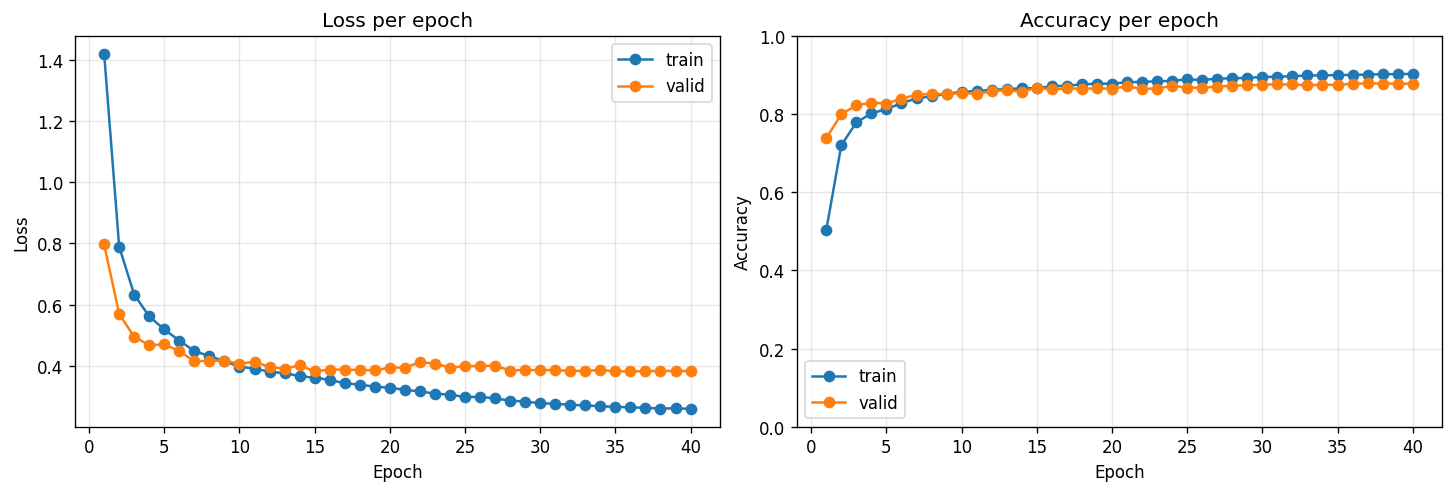

In [87]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, len(train_loss) + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# --- Loss ---
axes[0].plot(epochs, train_loss, marker='o', label='train')
axes[0].plot(epochs, valid_loss, marker='o', label='valid')
axes[0].set_title('Loss per epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].grid(alpha=0.3)
axes[0].legend()

# --- Accuracy ---
axes[1].plot(epochs, train_metric, marker='o', label='train')
axes[1].plot(epochs, valid_metric, marker='o', label='valid')
axes[1].set_title('Accuracy per epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0, 1)
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.show()

5. Попробуй создать еще 2 модели с разной архитектурой и проанализируй качество ыих решений. Для этого распечатай графики лосса и метрики на выборках. На что повлияло число нейронов и слоев? 

    ❗️ Самые сложные модели должны достигать качества >80% на валидационной части выборки.

    ❗️ При создании новой модели **обязательно** нужно создать новый оптимизатор, в который будут передаваться параметры новой модели. 

In [89]:
# Задаем класс модели
class NextTorchClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 16)
        self.fc7 = nn.Linear(16, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # x = x.view(x.size(0), -1)
        x = x.flatten(1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        return self.fc7(x)

In [90]:
nextmodel = NextTorchClassifier().to(DEVICE)
tu.get_model_summary(nextmodel, torch.randn(64, 28, 28, device=DEVICE))

Layer         Kernel      Output     Params         FLOPs
0_fc1       [784, 512]   [64, 512]   401,920   51,347,456
1_fc2       [512, 256]   [64, 256]   131,328   16,760,832
2_dropout            -   [64, 256]         0            0
3_fc3       [256, 128]   [64, 128]    32,896    4,186,112
4_fc4        [128, 64]    [64, 64]     8,256    1,044,480
5_dropout            -    [64, 64]         0            0
6_fc5         [64, 32]    [64, 32]     2,080      260,096
7_fc6         [32, 16]    [64, 16]       528       64,512
8_fc7         [16, 10]    [64, 10]       170       19,840
Total params: 577,178
Trainable params: 577,178
Non-trainable params: 0
Total FLOPs: 73,683,328 / 73.68 MFLOPs
---------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.65
Params size (MB): 2.20
Estimated Total Size (MB): 3.05


In [91]:
optimizer = torch.optim.AdamW(nextmodel.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

In [92]:
train_loss, valid_loss, train_metric, valid_metric = fit_model(
    epochs=40, model=nextmodel, optimizer=optimizer
)

------------- Epoch 1 -------------
train: accuracy 0.5389, loss 1.1566
valid: accuracy 0.7297, loss 0.7096
-----------------------------------

------------- Epoch 2 -------------
train: accuracy 0.7684, loss 0.6271
valid: accuracy 0.7885, loss 0.5635
-----------------------------------

------------- Epoch 3 -------------
train: accuracy 0.8282, loss 0.4837
valid: accuracy 0.8233, loss 0.4670
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.8474, loss 0.4313
valid: accuracy 0.8471, loss 0.4238
-----------------------------------

------------- Epoch 5 -------------
train: accuracy 0.8579, loss 0.4010
valid: accuracy 0.8577, loss 0.4016
-----------------------------------

------------- Epoch 6 -------------
train: accuracy 0.8630, loss 0.3848
valid: accuracy 0.8557, loss 0.3945
-----------------------------------

------------- Epoch 7 -------------
train: accuracy 0.8703, loss 0.3704
valid: accuracy 0.8539, loss 0.4028
----------------------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, len(train_loss) + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# --- Loss ---
axes[0].plot(epochs, train_loss, marker='o', label='train')
axes[0].plot(epochs, valid_loss, marker='o', label='valid')
axes[0].set_title('Loss per epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].grid(alpha=0.3)
axes[0].legend()

# --- Accuracy ---
axes[1].plot(epochs, train_metric, marker='o', label='train')
axes[1].plot(epochs, valid_metric, marker='o', label='valid')
axes[1].set_title('Accuracy per epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0, 1)
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.show()

# ❓

Для чего при обучении применяется слой `Dropout`?

> ответ тут

6. Обучи лучшую модель 3 раза с тремя разными оптимизаторами: `SGD`, `Adagrad`, `Adadelta`. Визуализируй график лосса и сравни, как изменяется значение функции потерь в зависимости от используемого алгоритма оптимизации. Какой алгоритм самый лучший?

В результате должен получиться **примерно** такой график: 

![](aux/imgs/08-02-res.png)

In [ ]:
# code

### 🎓 Реализуй архитектуру, представленную ниже, и сравни ее эффективность с обученными выше моделями. 
Такое можно сделать только с помощью разработки класса модели, обычный sequential-подход тут не поможет. 


<img src="aux/imgs/simple_skip_con.png" height=500>